Anomaly-Detection-using-UNSW-NB15-Dataset.git

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Acquistion



In [2]:
train_data = pd.read_csv('/content/UNSW_NB15_training-set.csv')
test_data = pd.read_csv('/content/UNSW_NB15_testing-set.csv')

#Data Preprocessing and EDA

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [ ]:
train_data.shape

(175341, 45)

In [ ]:
test_data.shape

(82332, 45)

In [ ]:
train_data.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [ ]:
train_data['service'].value_counts()

-           94168
dns         47294
http        18724
smtp         5058
ftp-data     3995
ftp          3428
ssh          1302
pop3         1105
dhcp           94
snmp           80
ssl            56
irc            25
radius         12
Name: service, dtype: int64

In [4]:
#To provide the - values with a term of note, unknown
train_data['service'] = train_data['service'].replace('-', 'unknown')
test_data['service'] = test_data['service'].replace('-', 'unknown')

In [ ]:
train_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,unknown,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,unknown,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,unknown,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,unknown,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [ ]:
test_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,unknown,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,unknown,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,unknown,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,unknown,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,unknown,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [8]:
print(train_data.describe())

                  id            dur          spkts          dpkts  \
count  175341.000000  175341.000000  175341.000000  175341.000000   
mean    87671.000000       1.359389      20.298664      18.969591   
std     50616.731112       6.480249     136.887597     110.258271   
min         1.000000       0.000000       1.000000       0.000000   
25%     43836.000000       0.000008       2.000000       0.000000   
50%     87671.000000       0.001582       2.000000       2.000000   
75%    131506.000000       0.668069      12.000000      10.000000   
max    175341.000000      59.999989    9616.000000   10974.000000   

             sbytes        dbytes          rate           sttl           dttl  \
count  1.753410e+05  1.753410e+05  1.753410e+05  175341.000000  175341.000000   
mean   8.844844e+03  1.492892e+04  9.540619e+04     179.546997      79.609567   
std    1.747656e+05  1.436542e+05  1.654010e+05     102.940011     110.506863   
min    2.800000e+01  0.000000e+00  0.000000e+00       

In [9]:
print(test_data.describe())

                 id           dur         spkts         dpkts        sbytes  \
count  82332.000000  82332.000000  82332.000000  82332.000000  8.233200e+04   
mean   41166.500000      1.006756     18.666472     17.545936  7.993908e+03   
std    23767.345519      4.710444    133.916353    115.574086  1.716423e+05   
min        1.000000      0.000000      1.000000      0.000000  2.400000e+01   
25%    20583.750000      0.000008      2.000000      0.000000  1.140000e+02   
50%    41166.500000      0.014138      6.000000      2.000000  5.340000e+02   
75%    61749.250000      0.719360     12.000000     10.000000  1.280000e+03   
max    82332.000000     59.999989  10646.000000  11018.000000  1.435577e+07   

             dbytes          rate          sttl          dttl         sload  \
count  8.233200e+04  8.233200e+04  82332.000000  82332.000000  8.233200e+04   
mean   1.323379e+04  8.241089e+04    180.967667     95.713003  6.454902e+07   
std    1.514715e+05  1.486204e+05    101.513358    

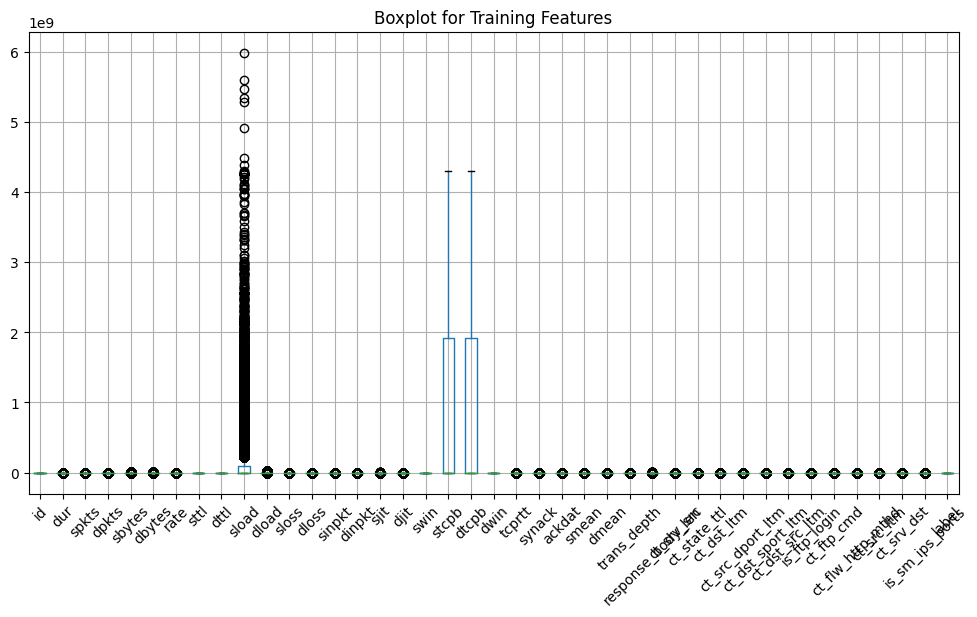

In [10]:
#Visualize distriubiton for each training feature via box plot
train_data.boxplot(figsize=(12, 6))
plt.xticks(rotation=45)
plt.title('Boxplot for Training Features')
plt.show()

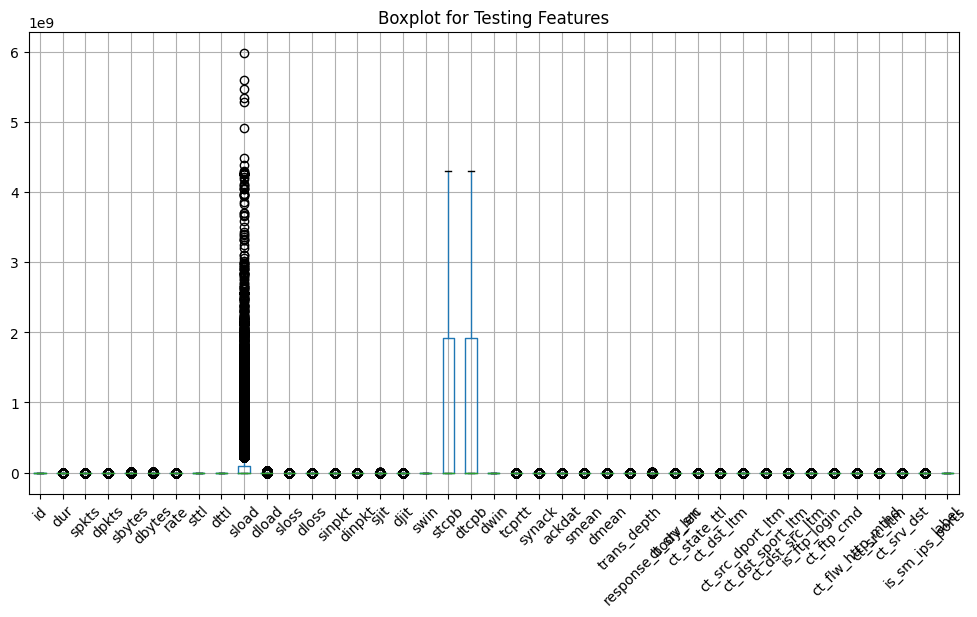

In [12]:
#Visualize distriubiton for each test feature via box plot
train_data.boxplot(figsize=(12, 6))
plt.xticks(rotation=45)
plt.title('Boxplot for Testing Features')
plt.show()

In [13]:
# Calculate the number of outliers for each numerical column
Q1 = train_data.quantile(0.25, numeric_only=True)
Q3 = train_data.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
#This aligns the training data with the quartile range metrics and computes the outliers using 1.5 times IQR to qualify points as outliers
train_data_aligned, Q1_aligned = train_data.align(Q1, axis=1, join='inner')
train_data_aligned, Q3_aligned = train_data_aligned.align(Q3, axis=1, join='inner')
outliers_count = ((train_data_aligned < (Q1_aligned - 1.5 * IQR)) | (train_data_aligned > (Q3_aligned + 1.5 * IQR))).sum()
print("Number of outliers for each column:")
print(outliers_count)


Number of outliers for each column:
id                       0
dur                  15741
spkts                24675
dpkts                20830
sbytes               22873
dbytes               28131
rate                 17340
sttl                     0
dttl                     0
sload                13518
dload                38143
sloss                11467
dloss                28388
sinpkt               14788
dinpkt               14096
sjit                 18033
djit                 20574
swin                     0
stcpb                    0
dtcpb                    0
dwin                     0
tcprtt               15878
synack               31462
ackdat                8290
smean                20725
dmean                23359
trans_depth          17840
response_body_len    11294
ct_srv_src           19390
ct_state_ttl          1930
ct_dst_ltm           22152
ct_src_dport_ltm     33423
ct_dst_sport_ltm     37337
ct_dst_src_ltm       17752
is_ftp_login          2567
ct_ftp_cmd         

Most of the variables have values very close to zero which indicates thatfor these variables, either the data points are all very small, or there is very little variation among them. One variable 'sload' is with a vastly different scale than the others. It has a highly skewed distribution with a long tail of high values. The majority of the data is concentrated within a relatively narrow range, but there are significant outliers that extend far beyond this range. This suggests that the variable may have extreme values that could potentially influence the analysis.stcpb and dtcpb have distributions that are less skewed compared to sload. Although they have a wider range of values compared to most other variables, their scales are smaller, suggesting that the variability within these variables is not as extreme. The skew towards lower values indicates that the majority of the data falls within lower ranges, with fewer outliers extending towards higher values.

With the above in mind, given the context of this project to build models for anamoly detection, outlier results are often strong indicators of anamolies and therefore, given the goal of the proejct, may be integreal in identifying insatnces as anamolies. Removal of outliers cna be considered adn would be especially viable in many contexts howver, the desire to idenfitiy anamolies presents a unique situation. This is further corroborated by the vast amount of qualifying outliers based on IQR computations, and this could impact the distribution of the anamolies and normal instances if removed as well as simly being a subsatntial amount of data. Doing so may result in a large loss of important patterns in the data and neagtivley imapct results. As a result, we opt to continue with the dataset as is, finalize preprocessing, and build models for anamoly detection. If performance consistently suffers, we may revisit this and employ suitable methods at that point.

In [15]:
#This randomly samples the data and splits the training and testing each into input feature dfs and target dfs
#We randomly sample to improve computational overhead given the limitatiomns of our machines. 50 used for reproducability with the random state
train_sample = train_data.sample(frac=.5, random_state=50)
test_sample = test_data.sample(frac=.5, random_state=50)
count = 0
for i in train_sample:
  if i == 'attack_cat':
    attk_index = count
  if i == 'label':
    label_index = count
  count += 1

x_train = train_sample.iloc[:, :attk_index]
y_train = train_sample.iloc[:, label_index]
x_test = test_sample.iloc[:, :attk_index]
y_test = test_sample.iloc[:, label_index]
y_train_attks = train_sample.iloc[:, attk_index]
y_test_attks = test_sample.iloc[:, attk_index]

In [ ]:
x_train

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,85118,0.341402,tcp,unknown,FIN,10,6,538,268,43.936474,...,2,2,1,10,0,0,0,2,10,0
1,82474,0.975572,tcp,unknown,FIN,10,8,648,354,17.425675,...,2,1,1,3,0,0,0,3,2,0
2,84418,0.361567,tcp,http,FIN,10,10,802,4268,52.549045,...,1,1,1,2,0,0,1,1,2,0
3,7761,0.003910,tcp,ftp-data,FIN,10,12,528,8824,5370.844031,...,8,1,1,5,0,0,0,6,3,0
4,1518,0.023429,tcp,unknown,FIN,16,18,1540,1644,1408.510775,...,8,6,1,6,0,0,0,10,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87665,59029,0.000008,unas,unknown,INT,2,0,200,0,125000.000300,...,1,1,1,4,0,0,0,13,4,0
87666,143802,0.000008,udp,dns,INT,2,0,114,0,125000.000300,...,27,27,14,39,0,0,0,27,39,0
87667,145848,0.000002,udp,dns,INT,2,0,114,0,500000.001300,...,32,32,17,32,0,0,0,34,32,0
87668,51084,10.720804,rvd,unknown,INT,4,0,400,0,0.279830,...,2,2,2,2,0,0,0,20,2,0


In [16]:
#Here we code logic to determine for categorical features, if there are discrepncies between unqiue values in the trainig and test
object_cols = []
for i in x_train:
  if x_train[i].dtype == 'object':
    object_cols.append(i)
train_not_test = {}
test_not_train = {}
for feature in object_cols:
  missing_from_test = []
  missing_from_train = []
  unique_vals_train = x_train[feature].unique()
  unique_vals_test = x_test[feature].unique()
  for val in unique_vals_train:
    if val not in unique_vals_test:
      missing_from_test.append(val)
  for val_2 in unique_vals_test:
    if val_2 in missing_from_test:
      continue
    if val_2 not in unique_vals_train:
      missing_from_train.append(val_2)
  train_not_test[feature] = missing_from_test
  test_not_train[feature] = missing_from_train
print(train_not_test)
print(test_not_train)


{'proto': ['icmp', 'rtp'], 'service': [], 'state': ['RST', 'ECO', 'PAR']}
{'proto': [], 'service': [], 'state': ['CLO', 'ACC']}


In [17]:
#Based on these determine discrepencies, we move to identify the rows in each the training and test dfs
rows_train = []
for key, vals in train_not_test.items():
  for instance, count in zip(x_train[key], range(len(x_train[key]))):
    if instance in vals:
      if count in rows_train:
        continue
      rows_train.append(count)

#This one is for the test features
rows_test = []
for key, vals in test_not_train.items():
  for instance, count in zip(x_test[key], range(len(x_test[key]))):
    if instance in vals:
      if count in rows_test:
        continue
      rows_test.append(count)

#Based on these idicies for the trainign and test sets, we remove the rows which present this issue
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
x_train_aligned = x_train.drop(rows_train)
x_test_aligned = x_test.drop(rows_test)

In [18]:
#Remove the same rows from the target df
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_training = y_train.drop(rows_train)
y_testing = y_test.drop(rows_test)

In [19]:
#Remove the same rows from the attack label target df
y_train_attks = y_train_attks.reset_index(drop=True)
y_test_attks = y_test_attks.reset_index(drop=True)
y_training_attks = y_train_attks.drop(rows_train)
y_testing_attks = y_test_attks.drop(rows_test)

In [20]:
#This re runs the code above to now show there are no discrpencies in unique values for the vategorical features
#This solves the issue which would have arisen whenm the time came for one hot encoding
object_cols = []
for i in x_train_aligned:
  if x_train[i].dtype == 'object':
    object_cols.append(i)
train_not_test = {}
test_not_train = {}
for feature in object_cols:
  missing_from_test = []
  missing_from_train = []
  unique_vals_train = x_train_aligned[feature].unique()
  unique_vals_test = x_test_aligned[feature].unique()
  for val in unique_vals_train:
    if val not in unique_vals_test:
      missing_from_test.append(val)
  for val_2 in unique_vals_test:
    if val_2 in missing_from_test:
      continue
    if val_2 not in unique_vals_train:
      missing_from_train.append(val_2)
  train_not_test[feature] = missing_from_test
  test_not_train[feature] = missing_from_train
print(train_not_test)
print(test_not_train)


{'proto': [], 'service': [], 'state': []}
{'proto': [], 'service': [], 'state': []}


In [21]:
#This conducts ne hot encoding on the categorical values, now free from vairation between trainign and test due to above
categorical_columns = ['proto', 'service','state']
x_training = pd.get_dummies(x_train_aligned, columns=categorical_columns, prefix='', prefix_sep='')
x_testing = pd.get_dummies(x_test_aligned, columns=categorical_columns, prefix='', prefix_sep='')


In [22]:
#This drops id since it it not relevant in influencing the target
cols = ['id']
x_training.drop(cols, axis=1, inplace = True)
x_testing.drop(cols, axis=1, inplace=True)

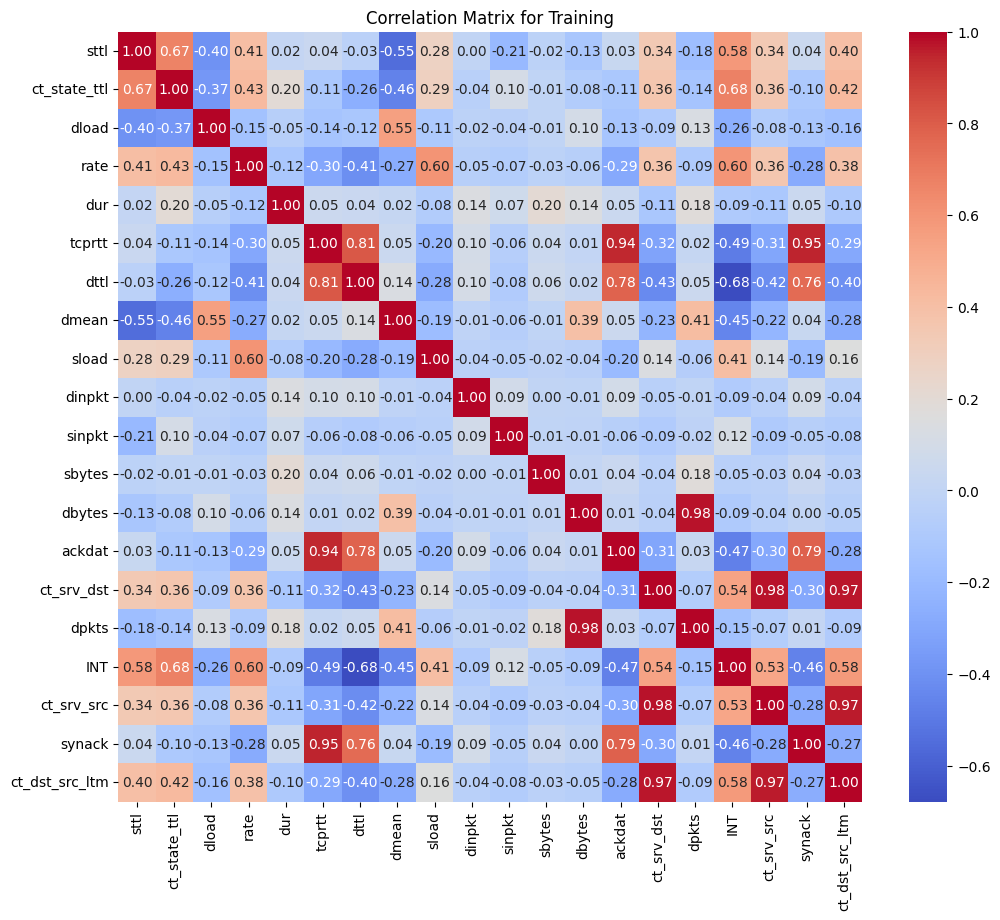

In [23]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Here we compute the correlation amtrix focusing on the training data and visualize it
features = ['sttl','ct_state_ttl','dload','rate','dur','tcprtt','dttl','dmean','sload','dinpkt','sinpkt','sbytes','dbytes','ackdat','ct_srv_dst','dpkts','INT','ct_srv_src','synack','ct_dst_src_ltm']
corr_matrix = x_training[features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Training')
plt.show()

There are several pairs of variables with very high positive correlation (close to 1). For example:
ct_state_ttl and sttl
ackdat and smean
synack and smean

There are also pairs with high negative correlation (values close to -1). For instance:
dmean and sttl

Many pairs of variables have a correlation close to 0, indicating no strong linear relationship between them. For example:
dload and sbytes
rate and sbytes

While we can note the presence of correlation among the features, the far majority do not exhibit such and therefore, in an effort to preserve the patterns in the natural state of this dataset as is, we opt to progress to the modeling with this preprocessed data. Again, as per above, if the models suffer, we may pivot back to this and implement necessayr measures regarding multicollinarity however currently, the presence is not notable adn given this dataset is specifically xurated for analogous projects, we seek to at least attempt to intially model in alignment with how it was crafted.

#Modeling

**Begin with experimenting various modeling techniques on the preprocessed dataset**

k-NN

I initalie with 7 to begin the process. WOuld perform girdsearch to optimize how the dimensioanlity incurs high computaional overhead. This will be implmentned below when PCA is introduced to reduce the dimensions and experiment further.

In [ ]:
#Here I train a k-NN model on the preprocessed data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
#I initalie with k of 7 and fit, train and rpodcue a classification rpeort fo the results
knn = KNeighborsClassifier(n_neighbors = 7)
trained_knn = knn.fit(x_training, y_training)
preds_knn = trained_knn.predict(x_testing)
results = classification_report(y_testing, preds_knn)
print(results)

              precision    recall  f1-score   support

           0       0.91      0.58      0.71     18581
           1       0.73      0.95      0.83     22581

    accuracy                           0.78     41162
   macro avg       0.82      0.76      0.77     41162
weighted avg       0.81      0.78      0.77     41162



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
#This contains the necessary code to establist, train, evaluate, and display the performance of the Log Reg
logistic_regression = LogisticRegression()
trained_logistic = logistic_regression.fit(x_training, y_training)
preds_logistic = trained_logistic.predict(x_testing)
results_logistic = classification_report(y_testing, preds_logistic)
print(results_logistic)

              precision    recall  f1-score   support

           0       0.89      0.40      0.55     18581
           1       0.66      0.96      0.78     22581

    accuracy                           0.71     41162
   macro avg       0.78      0.68      0.67     41162
weighted avg       0.76      0.71      0.68     41162



Random Forest

Here I train a Random Forest with an ensemble of 100 decision trees. I chose this to simply embark on the modeling and may adjust depedning on experimentation results. Following the construction of the model, I will determine the relevant features for the Random Forest based on their individual impacts to the information gain for the classification and remove those which offer minimal influence. This effecivley produces a more robust model in terms of computational overhead and intepretability for feature impacts.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
#This inializes the Random Forest, trains, predicts, and computes a classification report
rf_classifier = RandomForestClassifier(n_estimators=100)
trained_rf = rf_classifier.fit(x_training, y_training)
preds_rf = trained_rf.predict(x_testing)
results_rf = classification_report(y_testing, preds_rf)
print(results_rf)

              precision    recall  f1-score   support

           0       0.98      0.73      0.83     18581
           1       0.81      0.99      0.89     22581

    accuracy                           0.87     41162
   macro avg       0.90      0.86      0.86     41162
weighted avg       0.89      0.87      0.87     41162



Index(['sttl', 'ct_state_ttl', 'dload', 'dur', 'rate', 'tcprtt', 'dttl',
       'ackdat', 'sload', 'synack',
       ...
       'pvp', 'sdrp', 'br-sat-mon', 'pipe', 'encap', 'ippc', 'ttp', 'sat-mon',
       'tlsp', 'l2tp'],
      dtype='object', length=187)


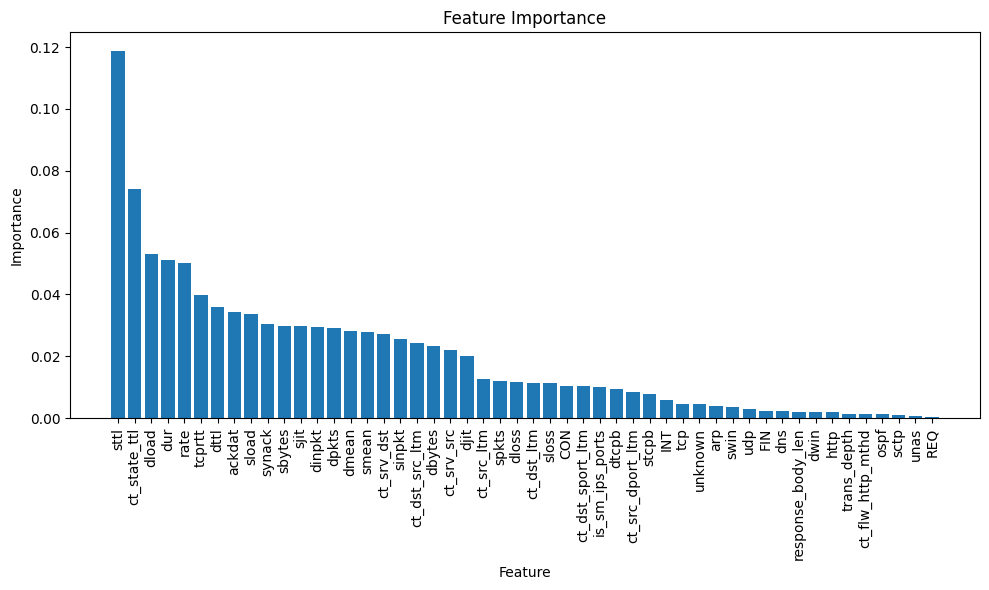

In [ ]:
#Here I compute the importance for each feature in the Random Forest model and sort the vlaues and their names via magnitude
feature_importance = rf_classifier.feature_importances_
feature_names = x_training.columns
sorted_indices = feature_importance.argsort()[::-1]
print(feature_names[sorted_indices])
#This is a plot to provide a visual for the top 50 important features
top_feature_names = feature_names[sorted_indices][:50]
top_feature_importance = feature_importance[sorted_indices][:50]
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_feature_importance)), top_feature_importance, align='center')
plt.xticks(range(len(top_feature_importance)), top_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

As we can see, the importance drops off after a portion of the features ordered by importance. We will work with a threshold close to 0 below and elminate those below to model another Random forest model. If performance remains virutally unchanged then we will move forward with this product

In [ ]:
#I establish a threshold close to 0 so if any features fall below, they get removed from the feature set.
#I may adjust this value if perforamnce suffers
clear_threshold = []
for i, feature in zip(feature_importance, feature_names[sorted_indices]):
  if i >= .005:
    clear_threshold.append(feature)
clear_threshold

['sttl',
 'ct_state_ttl',
 'dload',
 'rate',
 'sload',
 'sbytes',
 'dttl',
 'ackdat',
 'tcprtt',
 'dur',
 'dinpkt',
 'sinpkt',
 'ct_srv_dst',
 'dmean',
 'synack',
 'dbytes',
 'smean',
 'ct_dst_src_ltm',
 'dpkts',
 'INT',
 'sjit',
 'djit',
 'spkts',
 'sloss',
 'dtcpb',
 'arp',
 'stcpb',
 'CON',
 'dloss',
 'swin',
 'dwin',
 'udp',
 'unknown',
 'ospf',
 'fire',
 'srp']

In [ ]:
#This sets the new feature set
x_training_relevant = x_training[clear_threshold]
x_testing_relevant = x_testing[clear_threshold]

In [ ]:
#Using the modeling approach above, I retrain the random forest based on these relevant features and display performance
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf_classifier = RandomForestClassifier(n_estimators=100)
trained_rf = rf_classifier.fit(x_training_relevant, y_training)
preds_rf_select = trained_rf.predict(x_testing_relevant)
results_rf_select = classification_report(y_testing, preds_rf_select)
print(results_rf_select)

              precision    recall  f1-score   support

           0       0.98      0.74      0.84     18581
           1       0.82      0.98      0.89     22581

    accuracy                           0.87     41162
   macro avg       0.90      0.86      0.87     41162
weighted avg       0.89      0.87      0.87     41162



We will begin a rough range estimate to optimize the number of trees now that we see the dimenisonally reduced model sees no drop in performance. This was expected though as we only eliminated the features with minimal impact. The rough range esitmate to optimize the tree value will be further explained following the process

In [ ]:
#150 trees assessment
rf_classifier = RandomForestClassifier(n_estimators=150)
trained_rf = rf_classifier.fit(x_training_relevant, y_training)
preds_rf_select_150 = trained_rf.predict(x_testing_relevant)
results_rf_select_150 = classification_report(y_testing, preds_rf_select_150)
print(results_rf_select_150)

              precision    recall  f1-score   support

           0       0.98      0.74      0.84     18581
           1       0.82      0.99      0.90     22581

    accuracy                           0.87     41162
   macro avg       0.90      0.86      0.87     41162
weighted avg       0.89      0.87      0.87     41162



In [ ]:
#300 trees assessment
rf_classifier = RandomForestClassifier(n_estimators=300)
trained_rf = rf_classifier.fit(x_training_relevant, y_training)
preds_rf_select_300 = trained_rf.predict(x_testing_relevant)
results_rf_select_300 = classification_report(y_testing, preds_rf_select_300)
print(results_rf_select_300)

              precision    recall  f1-score   support

           0       0.98      0.74      0.84     18581
           1       0.82      0.99      0.89     22581

    accuracy                           0.87     41162
   macro avg       0.90      0.86      0.87     41162
weighted avg       0.89      0.87      0.87     41162



In [ ]:
#200 trees assessment
rf_classifier = RandomForestClassifier(n_estimators=200)
trained_rf = rf_classifier.fit(x_training_relevant, y_training)
preds_rf_select_200 = trained_rf.predict(x_testing_relevant)
results_rf_select_200 = classification_report(y_testing, preds_rf_select_200)
print(results_rf_select_200)

              precision    recall  f1-score   support

           0       0.98      0.74      0.84     18581
           1       0.82      0.99      0.90     22581

    accuracy                           0.87     41162
   macro avg       0.90      0.86      0.87     41162
weighted avg       0.89      0.87      0.87     41162



In [ ]:
#165 trees assessment
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf_classifier = RandomForestClassifier(n_estimators=165)
trained_rf = rf_classifier.fit(x_training_relevant, y_training)
preds_rf_select_165 = trained_rf.predict(x_testing_relevant)
results_rf_select_165 = classification_report(y_testing, preds_rf_select_165)
print(results_rf_select_165)

              precision    recall  f1-score   support

           0       0.98      0.73      0.84     18581
           1       0.82      0.99      0.89     22581

    accuracy                           0.87     41162
   macro avg       0.90      0.86      0.87     41162
weighted avg       0.89      0.87      0.87     41162



The above process displays an experimentation with the number of trees in the Random Forest in an effort to optimize this value with respect to the resulting performance metrics. Manually engaging in the practice as seen above is limited as we cannot encompass every value and this procedure would be automated via gridsearch or self coded logic however due to computational limitations, this is not suitable. As a result, we pivoted to test some ranges of values to roughly find the the optimal number of trees in a balance with computation. Following this process, we decided on 150 trees since it offers the improved performance of the larger tree testings while offering the best balance of performance and computational overhead.

**Select the threshold for normal or anamoly association via optimal F1-Score at said threshold**



Here we essenitally compute the employ the range of potential thresholds for an anaomly probability to be determined as an anaomly and subseqently compute the relationship between precisiona dn recall as the threshold range is progressed through. Following this, visualized in the image below, we compute the f1-score at each threshold value and determine which threhold value correpsonds to the highest f1-score. We then employ said threshold value to then compute prediction using the random forest model however with this threshold as the means of determining anamoly or not. The results are displayued via a classification report.

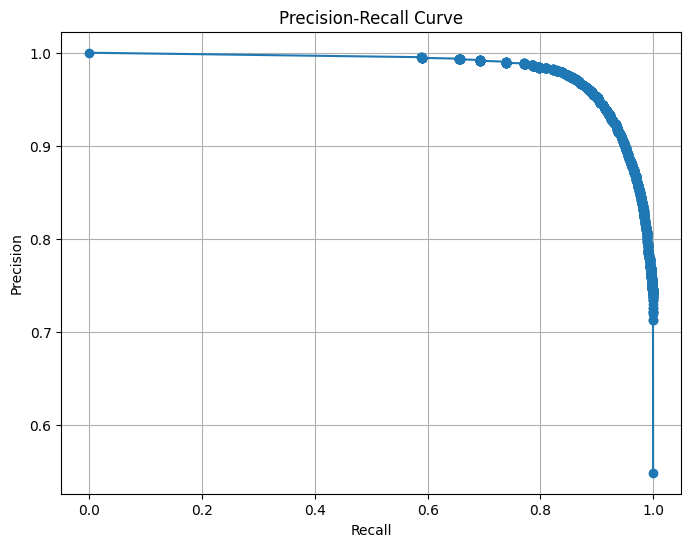

Optimal Threshold for RF Select 150: 0.7757575757575758
              precision    recall  f1-score   support

           0       0.92      0.91      0.91     18581
           1       0.92      0.93      0.93     22581

    accuracy                           0.92     41162
   macro avg       0.92      0.92      0.92     41162
weighted avg       0.92      0.92      0.92     41162



In [ ]:
from sklearn.metrics import precision_recall_curve
#Here we isolate the anamoly probabilites from the normal probabilites for each instance
preds_proba_rf_select_150 = trained_rf.predict_proba(x_testing_relevant)
anomaly_probas_rf_select_150 = []
normal_probas_rf_select_150 = []
for i in preds_proba_rf_select_150:
    anomaly_probas_rf_select_150.append(i[1])
    normal_probas_rf_select_150.append(i[0])

#This gathers the precison and recall values at each point in the progression through threshold range
precision_rf_select_150, recall_rf_select_150, thresholds_rf_select_150 = precision_recall_curve(y_testing, anomaly_probas_rf_select_150)

#This visualizes the relationhsip between recall and precision at the varying thresholds
plt.figure(figsize=(8, 6))
plt.plot(recall_rf_select_150, precision_rf_select_150, marker='o', linestyle='-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

#Here we compute the f-1 score for every threshold value, sort by magnitude, and select the optimal threshold value based on highets f1-score
f1_scores_rf_select_150 = 2 * (precision_rf_select_150 * recall_rf_select_150) / (precision_rf_select_150 + recall_rf_select_150)

optimal_threshold_index_rf_select_150 = np.argmax(f1_scores_rf_select_150)

optimal_threshold_rf_select_150 = thresholds_rf_select_150[optimal_threshold_index_rf_select_150]

print(f"Optimal Threshold for RF Select 150: {optimal_threshold_rf_select_150}")

#We then employ this threshold to now compute prediciton using the model with this threshold as what is needed to be cleared to be an anamolous prediction
tuned_rf_select_150_preds = []

for i in anomaly_probas_rf_select_150:
    if i >= optimal_threshold_rf_select_150:
        tuned_rf_select_150_preds.append(1)
    if i < optimal_threshold_rf_select_150:
        tuned_rf_select_150_preds.append(0)

tuned_rf_select_150_report = classification_report(y_testing, tuned_rf_select_150_preds)
print(tuned_rf_select_150_report)


XGboost

We now plan to conduct boosting with the robust XG Boost which uses decision trees as base learners and trains them with attention to the residuals of the prior, resulting in a collection of trees which together form a strong learner

In [ ]:
import xgboost as xgb
#We intilaize the xg boost algorithm with the means of modeling via Logistic regression
xgb_classifier = xgb.XGBClassifier()
#Train, test and display results for the ensemble
trained_xgb = xgb_classifier.fit(x_training, y_training)
preds_xgb = trained_xgb.predict(x_testing)
preds_proba_xgb = trained_xgb.predict_proba(x_testing)
results_xgb = classification_report(y_testing, preds_xgb)
print(results_xgb)

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     18581
           1       0.82      0.98      0.89     22581

    accuracy                           0.87     41162
   macro avg       0.89      0.86      0.87     41162
weighted avg       0.89      0.87      0.87     41162



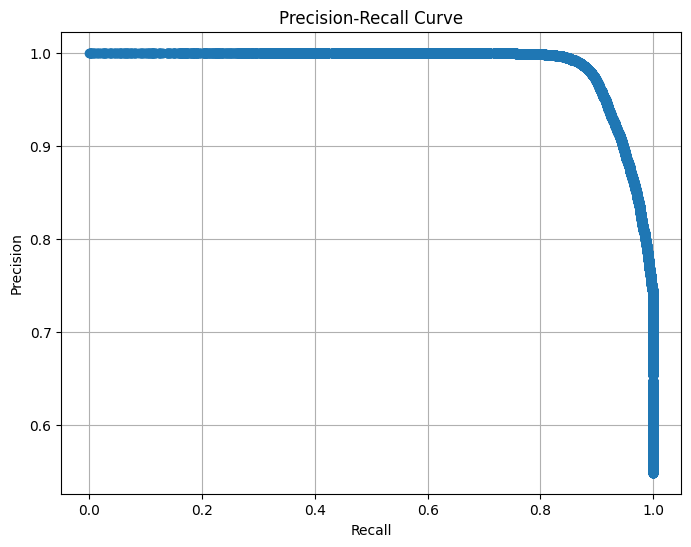

Optimal Threshold for XGB 0.911535918712616
              precision    recall  f1-score   support

           0       0.89      0.96      0.93     18581
           1       0.97      0.90      0.93     22581

    accuracy                           0.93     41162
   macro avg       0.93      0.93      0.93     41162
weighted avg       0.93      0.93      0.93     41162



In [ ]:
#Here we isolate the anamoly probabilites from the normal probabilites for each instance
anamoly_probas_xgb = []
normal_probas_xgb = []
for i in preds_proba_xgb:
  anamoly_probas_xgb.append(i[1])
  normal_probas_xgb.append(i[0])

#This gathers the precison and recall values at each point in the progression through threshold range
precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(y_testing, anamoly_probas_xgb)

#This visualizes the relationhsip between recall and precision at the varying thresholds
plt.figure(figsize=(8, 6))
plt.plot(recall_xgb, precision_xgb, marker='o', linestyle='-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

#Here we compute the f-1 score for every threshold value, sort by magnitude, and select the optimal threshold value based on highets f1-score
f1_scores = 2 * (precision_xgb * recall_xgb) / (precision_xgb + recall_xgb)
optimal_threshold_index = np.argmax(f1_scores)
optimal_threshold_xgb = thresholds_xgb[optimal_threshold_index]
print(f"Optimal Threshold for XGB {optimal_threshold_xgb}")

#We then employ this threshold to now compute prediciton using the model with this threshold as what is needed to be cleared to be an anamolous prediction
tuned_xgb_preds = []

for i in anamoly_probas_xgb:
  if i >= optimal_threshold_xgb:
    tuned_xgb_preds.append(1)
  if i < optimal_threshold_xgb:
    tuned_xgb_preds.append(0)
tuned_xgb_report = classification_report(y_testing, tuned_xgb_preds)
print(tuned_xgb_report)

LightGBM binary classifer

Here we move to incorporate a LightGBM boosted method utilizing the default binary classifier, from our understanding using decision trees as base learners, in an effort to produce another robust model.

In [ ]:
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
#This establishes the configuration for the LightGBM algorithm, fits it to the data, evaluates and displays the results
lgb_classifier = lgb.LGBMClassifier(objective='binary', metric='binary_logloss')
trained_lgb = lgb_classifier.fit(x_training, y_training)
preds_lgb = trained_lgb.predict(x_testing)
results_lgb = classification_report(y_testing, preds_lgb)
print("LightGBM Classifier:")
print(results_lgb)

[LightGBM] [Info] Number of positive: 59664, number of negative: 27954
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.126160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6240
[LightGBM] [Info] Number of data points in the train set: 87618, number of used features: 184
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.680956 -> initscore=0.758169
[LightGBM] [Info] Start training from score 0.758169
LightGBM Classifier:
              precision    recall  f1-score   support

           0       0.98      0.74      0.84     18581
           1       0.82      0.99      0.90     22581

    accuracy                           0.87     41162
   macro avg       0.90      0.86      0.87     41162
weighted avg       0.89      0.87      0.87     41162



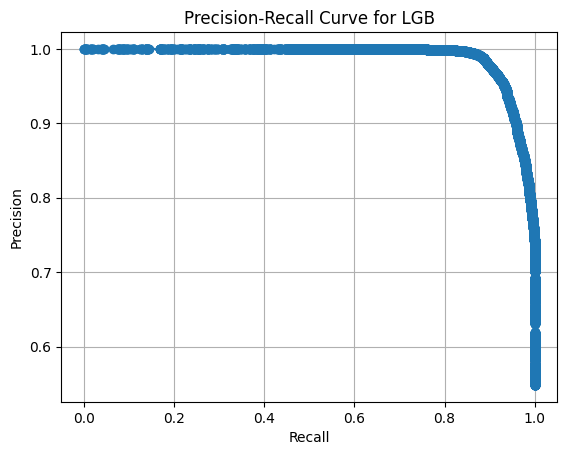

Optimal Threshold for LGB 0.843799974515992
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     18581
           1       0.95      0.93      0.94     22581

    accuracy                           0.94     41162
   macro avg       0.94      0.94      0.94     41162
weighted avg       0.94      0.94      0.94     41162



In [ ]:
#The logic is the same as per the above optimizations for the other models with this being for LightGBM
preds_proba_lgb = trained_lgb.predict_proba(x_testing)
anamoly_probas_lgb = []
normal_probas_lgb = []
for i in preds_proba_lgb:
  anamoly_probas_lgb.append(i[1])
  normal_probas_lgb.append(i[0])

precision_lgb, recall_lgb, thresholds_lgb = precision_recall_curve(y_testing, anamoly_probas_lgb)

plt.plot(recall_lgb, precision_lgb, marker='o', linestyle='-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for LGB')
plt.grid(True)
plt.show()

f1_scores = 2 * (precision_lgb * recall_lgb) / (precision_lgb + recall_lgb)
optimal_threshold_index = np.argmax(f1_scores)
optimal_threshold_lgb = thresholds_lgb[optimal_threshold_index]
print(f"Optimal Threshold for LGB {optimal_threshold_lgb}")


tuned_lgb_preds = []

for i in anamoly_probas_lgb:
  if i >= optimal_threshold_lgb:
    tuned_lgb_preds.append(1)
  if i < optimal_threshold_lgb:
    tuned_lgb_preds.append(0)

tuned_lgb_report = classification_report(y_testing, tuned_lgb_preds)
print(tuned_lgb_report)

#Experiment with the Models utilizing Principal Components as features from PCA

In this section, we pivot to apply PCA onto the features to reduce the dimensions in an effort to potentially improve model performance and computational intensivity. We can project that some models such as k-NN will improve due to sensitivity to large scale spatiality regarding distance betwene features when dimensions are high as k-NN is entielry based on distance. Logisitic regression could imrpove in scenarios of multicolinearity however these features do not bear strogn correlation amognst each other and therefore we do not expect Logsitict regression to improve substantianlly. Random forest performs well with high dimensional data and given the inevitiable tradeoff of some patterns/relationships in the data via PCA, we expect Random forest to decline in performance. For the XGBoots and LightGBM boost, we expect these to decline as well as they are based in decision trees and therefore are suitable to high dimensional data with the inevitable loss of some patterns/relationships potentially damaging performance in a similar light to random forest. In additon to these models, we will also incorporate an linear SVC model which with the previous high diemnsional data, suffered from tremendous computation. In order to determine the optimal princiapl components, we will employ the elbow method to select this value.

[0.81861329 0.99127678 0.9999985  0.99999998 0.99999999 0.99999999
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1. 

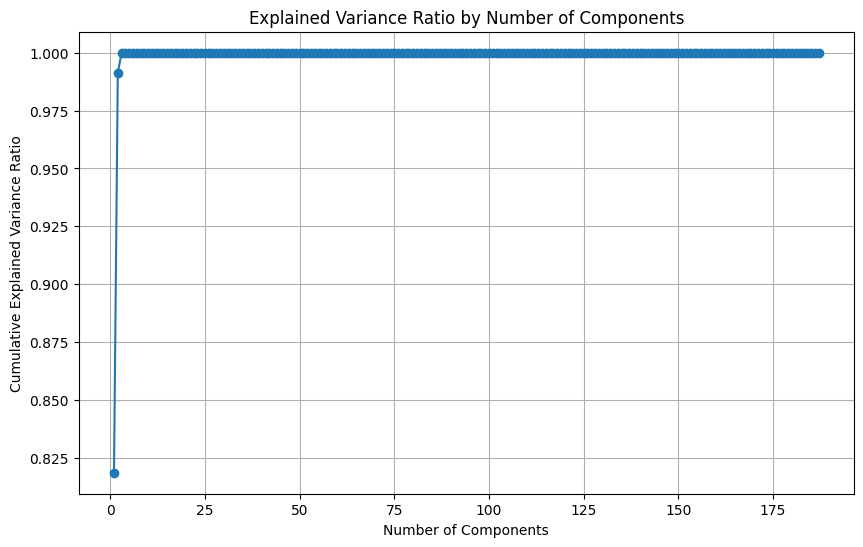

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#Here we intialize the PCA, fit to the training, and compute the cumulatoive variance to conduct elbow method
pca = PCA()
pca.fit(x_training)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance_ratio)
#We create a visual below to show the optimal PCs based on the cumulative variance collected
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.title('Explained Variance Ratio by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#This is to tranform the features via PCA based on the optimal 3 components as per the elbow method
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_training)
scaled_x_test = scaler.fit_transform(x_testing)
pca = PCA(n_components=3)
pca_x_train = pca.fit_transform(scaled_x_train)
pca_x_test = pca.fit_transform(scaled_x_test)
#We establish a new df for these PCs as features
pca_x_train_df = pd.DataFrame(data=pca_x_train, columns=['PC1', 'PC2', 'PC3'])
pca_x_test_df = pd.DataFrame(data=pca_x_test, columns=['PC1', 'PC2','PC3'])

#Modeling with PCA features

We pivot to experiment with conducting PCA to the input features and training the models on these to see if any improvment or simialr performance occurs. The data doe not exhibit multicollinearity so models which may imrpove as a product of dimishing this will liekly not see improvement. In addiiton, The models based in decision trees, our strongest performers, will likely see dimished performance as they work well with high dimensional data and the loss of these splits may hinder their ability to caputrue patterns. We can propose that k-NN will see improvements as this algorithm is prone to the curse of dimensionality with high dimensional data and therefore could see better performance. In addition, we wanted to experimetn with an SVM model which requires subsatntial computation with high dimensions and as a result was not viable for the vast input features. We apply the elbow method to deterime the numebr of PCs and apply this to the data and ustilize the PCA input to test the various models. As always, there may be factors and compinents not yet considered which could introduce unexpected improvemtn sin performance and thus making the usgae of this technqiue viable to explore this potential however we expect the results as described above.

In [ ]:
#k-nn above with PCA input
knn = KNeighborsClassifier(n_neighbors = 7)
trained_knn = knn.fit(pca_x_train_df, y_training)
preds_knn_pca = trained_knn.predict(pca_x_test_df)
results = classification_report(y_testing, preds_knn_pca)
print(results)

              precision    recall  f1-score   support

           0       0.86      0.63      0.73     18581
           1       0.75      0.92      0.83     22581

    accuracy                           0.79     41162
   macro avg       0.81      0.78      0.78     41162
weighted avg       0.80      0.79      0.78     41162



In [ ]:
from sklearn.model_selection import GridSearchCV
#we employ gridsearch to optimize k. This was too computationally large with the high dimensions so this is anpther plus of the PCA
param_grid = {'n_neighbors': range(1, 21)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(pca_x_train_df, y_training)
best_knn = grid_search.best_estimator_
preds_knn = best_knn.predict(pca_x_test_df)
results = classification_report(y_testing, preds_knn)
print("Best Parameters:", grid_search.best_params_)
print(results)


Best Parameters: {'n_neighbors': 13}
              precision    recall  f1-score   support

           0       0.88      0.62      0.73     18581
           1       0.75      0.93      0.83     22581

    accuracy                           0.79     41162
   macro avg       0.81      0.78      0.78     41162
weighted avg       0.81      0.79      0.78     41162



In [ ]:
#Random Forest as above with PCA input
rf_classifier = RandomForestClassifier(n_estimators=100)
trained_rf = rf_classifier.fit(pca_x_train_df, y_training)
preds_rf = trained_rf.predict(pca_x_test_df)
results_rf = classification_report(y_testing, preds_rf)
print(results_rf)


              precision    recall  f1-score   support

           0       0.84      0.62      0.71     18581
           1       0.74      0.90      0.81     22581

    accuracy                           0.77     41162
   macro avg       0.79      0.76      0.76     41162
weighted avg       0.79      0.77      0.77     41162



In [ ]:
from sklearn.svm import SVC
#here we train a linear svc to build an SVM. This was theoritically possible above but pratcially not viable
svm_classifier = SVC()
trained_svm = svm_classifier.fit(pca_x_train_df, y_training)
preds_svm = trained_svm.predict(pca_x_test_df)
results_svm = classification_report(y_testing, preds_svm)
print(results_svm)

              precision    recall  f1-score   support

           0       0.93      0.54      0.68     18581
           1       0.72      0.97      0.82     22581

    accuracy                           0.77     41162
   macro avg       0.82      0.75      0.75     41162
weighted avg       0.81      0.77      0.76     41162



In [ ]:
#Log reg as above with PCA input
logistic_regression = LogisticRegression()
trained_logistic = logistic_regression.fit(pca_x_train_df, y_training)
preds_logistic_pca = trained_logistic.predict(pca_x_test_df)
results_logistic = classification_report(y_testing, preds_logistic_pca)
print(results_logistic)


              precision    recall  f1-score   support

           0       0.77      0.31      0.44     18581
           1       0.62      0.93      0.74     22581

    accuracy                           0.65     41162
   macro avg       0.70      0.62      0.59     41162
weighted avg       0.69      0.65      0.60     41162



In [ ]:
#XG Boost as above with PCA input
xgb_classifier = xgb.XGBClassifier(base_estimator=LogisticRegression())
trained_xgb = xgb_classifier.fit(pca_x_train_df, y_training)
preds_xgb_pca = trained_xgb.predict(pca_x_test_df)
results_xgb = classification_report(y_testing, preds_xgb_pca)
print(results_xgb)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:03:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "base_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.86      0.60      0.71     18581
           1       0.74      0.92      0.82     22581

    accuracy                           0.78     41162
   macro avg       0.80      0.76      0.76     41162
weighted avg       0.79      0.78      0.77     41162



In [ ]:
#LightGBM as above with PCA input
lgb_classifier = lgb.LGBMClassifier(objective='binary', metric='binary_logloss')
trained_lgb = lgb_classifier.fit(pca_x_train_df, y_training)
preds_lgb = trained_lgb.predict(pca_x_test_df)
results_lgb = classification_report(y_testing, preds_lgb)
print("LightGBM Classifier:")
print(results_lgb)

[LightGBM] [Info] Number of positive: 59664, number of negative: 27954
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 87618, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.680956 -> initscore=0.758169
[LightGBM] [Info] Start training from score 0.758169
LightGBM Classifier:
              precision    recall  f1-score   support

           0       0.87      0.56      0.68     18581
           1       0.72      0.93      0.81     22581

    accuracy                           0.77     41162
   macro avg       0.80      0.75      0.75     41162
weighted avg       0.79      0.77      0.75     41162



#Results and Performance Visualizations

Following the comprehensive modeling above, we have a myriad of models with a variation in performance. Three specific models perform virtually the same as the top performers. We will go through each of these, in order of execution and display 3 numbers for each: Accuracy, F1-Score for normal state, and F1-Score for anamolous state. The Optimized Random Forest model for the high dimensional data with feature selection: .87, .83, .89. The XG boosted binary classifer: .87, .84, .89. The LightGBM boosted binary classifier: .87, .84, .90. Other models fell below .80 accuracy Overall, the best performing models were those conducted without PCA as described above. The goal of utilizing PCA was to see if we could produce models with close to or better performance compared to those with the high dimensional features. As expected, the models executed with PCA saw faster runtimes however their perforance suffered notably. The lack of multicollieanirty within the input features likely dimisihed the positive performance impact which PCA would have on several models. k-NN, highly sensitive to large spatial distance between high dimenisonal features, actually saw imrpoved performance with the PCA however even this was minimal. Overall, our three most robust models, as noted above, are all based in ensembles of decison trees, an tehcnique whihc itself is quite good for high dimenisonal data. As a result, we expected these models to suffer in perofrnance and this ntoiton was corroborated wiht the results as each of these three saw subsatntial drops in performance. In sum, we can conclude that PCA in the context of this data and the models we have built mostley sees a negatuve impact on our models and therefore we pivot back to focus on our robust high dimensional models. That being said, the optimized random forest model incorporates dimentionality reduction in of itself as we removed the features with minimal impact on information gain with the model retaining its high end performance. In the visualizations, we will focus on these three to provide an emphasis on the most useful models in therms of performance however feel free to look through the performance of them all in the above classification reports for each model. A confusion matrix for each of the select four models will be portrayed below

In [ ]:
from sklearn.metrics import confusion_matrix

**Our Top 3 performing models visualized below via a confusion matrix for each**

Optimized Random Forest with select features

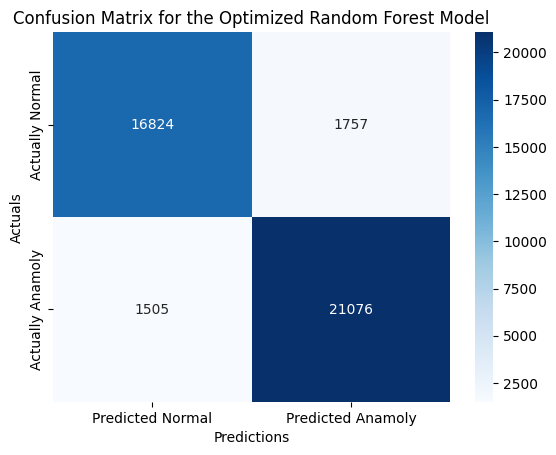

In [ ]:
#Here we produce a confusion matric for the Optimized RF
RF2_CM = confusion_matrix(y_testing, tuned_rf_select_150_preds)

sns.heatmap(RF2_CM, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Predicted Normal', 'Predicted Anamoly'],
            yticklabels=['Actually Normal', 'Actually Anamoly'])
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix for the Optimized Random Forest Model')
plt.show()

XG Boost Binary Classifier

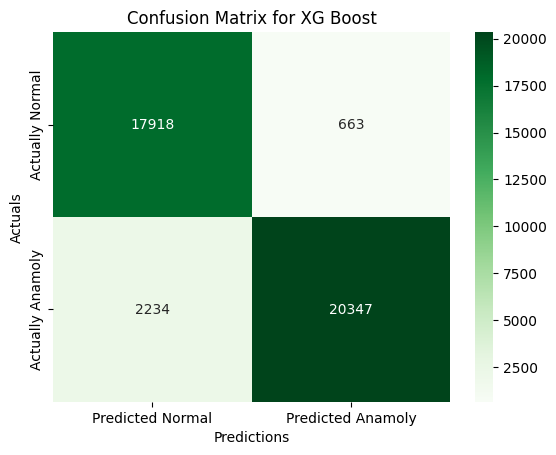

In [ ]:
#Here we produce a confusion matric for the XG boosted binary classifer
XG_CM = confusion_matrix(y_testing, tuned_xgb_preds)

sns.heatmap(XG_CM, annot=True, cmap='Greens', fmt='g',
            xticklabels=['Predicted Normal', 'Predicted Anamoly'],
            yticklabels=['Actually Normal', 'Actually Anamoly'])
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix for XG Boost')
plt.show()

LightGBM Boosted Binary Classifier

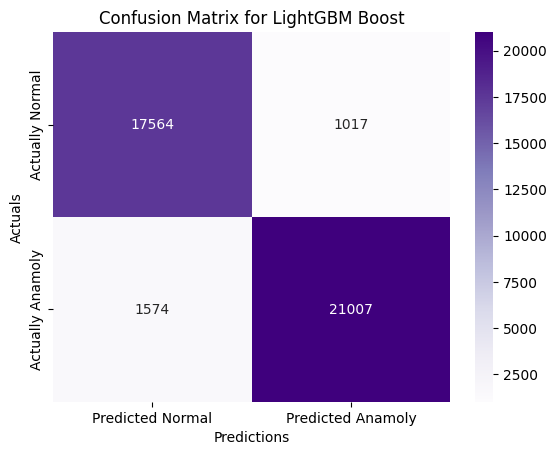

In [ ]:
#Here we produce a confusion matric for the LightGBM binary classifer
LGM_CM = confusion_matrix(y_testing, tuned_lgb_preds)

sns.heatmap(LGM_CM, annot=True, cmap='Purples', fmt='g',
            xticklabels=['Predicted Normal', 'Predicted Anamoly'],
            yticklabels=['Actually Normal', 'Actually Anamoly'])
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix for LightGBM Boost')
plt.show()

#Conclusion

In sum, we were effectivley able to develop three robust models as detailed in the confusion matricies above. We are quite satistifed with these models as their measures in accuracy, recall, precision, and f1-score are excellent. On top of this, each of the three models is computationally efficent and this is especially of note given the context of this project being anamoly detection. In a hypothetical deployment scneario, these models could be incorporated into real time IDS to support an organizations SIEM. As a result, the high accuracy and computational effieicnt woudl allwo for rapid determinations regarding if a network traffic insatnce is anamolous or not. This could be highly beneficial for such systems and increase their abiloty to act with speed to such occurences. The LightGBM model performed the best by a small margin and therefore, given their similar compuation times, would advise this model for deployment scenarios however suhc a suggestion would need further analysis of any specific context in which a deployment would occur. For furhter researcch, we would consider testing models of this configuration on data of different network traffic features as well as even multiclass attack classification given time to further enage in adiditonal intriacies for this dataset and potentially others as well.  